In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
base_path = '/content/drive/MyDrive/modelingPUBG/data/featured_data/'

In [ ]:
train_1 = reduce_mem_usage(pd.read_csv(base_path + 'featured_train_1.csv')) ## 1차 전처리 데이터
train_2 = reduce_mem_usage(pd.read_csv(base_path + 'featured_train_2.csv')) ## 2차 전처리 데이터
train_3 = reduce_mem_usage(pd.read_csv(base_path + 'featured_train_3.csv')) ## 3차 전처리 데이터
train_4 = reduce_mem_usage(pd.read_csv('/content/drive/MyDrive/modelingPUBG/최윤아/featured_train_4.csv')) ## 4차 전처리 데이터

In [ ]:
train_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026744 entries, 0 to 2026743
Data columns (total 47 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   assists_mean               float16
 1   boosts_mean                float16
 2   damageDealt_mean           float16
 3   DBNOs_mean                 float16
 4   headshotKills_mean         float16
 5   heals_mean                 float16
 6   killPlace_mean             float16
 7   killPoints_mean            float16
 8   kills_mean                 float16
 9   killStreaks_mean           float16
 10  longestKill_mean           float16
 11  maxPlace_mean              float16
 12  numGroups_mean             float16
 13  rankPoints_mean            float16
 14  revives_mean               float16
 15  rideDistance_mean          float16
 16  roadKills_mean             float16
 17  swimDistance_mean          float16
 18  teamKills_mean             float16
 19  vehicleDestroys_mean       float16
 20  wa

# 4차 Modeling
    - 데이터 전처리 파일(3차)의 성능이 떨어진 것을 확인
    - matchId, groupId를 기준으로 column별 평균, 평균의 rank 값으로만 전처리된 데이터로 모델링 진행

## train, test split

In [ ]:
from sklearn.model_selection import train_test_split

def check_error(model_, data_):

    X = data_.drop(columns = 'winPlacePerc')
    y = data_['winPlacePerc']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    model = model_
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return mean_absolute_error(y_test, pred)

## ML model

In [ ]:
# ML model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor


from sklearn.metrics import mean_absolute_error

In [ ]:
# LinearRegression

result_1 = check_error(LinearRegression(), train_1)
result_2 = check_error(LinearRegression(), train_2)
result_3 = check_error(LinearRegression(), train_3)
result_4 = check_error(LinearRegression(), train_4)

print(f"MAE of LinearRegression_1: {result_1:.4f}")
print(f"MAE of LinearRegression_2: {result_2:.4f}")
print(f"MAE of LinearRegression_3: {result_3:.4f}")
print(f"MAE of LinearRegression_4: {result_4:.4f}")

MAE of LinearRegression_1: 0.0968
MAE of LinearRegression_2: 0.1049
MAE of LinearRegression_3: 0.1060
MAE of LinearRegression_4: 0.0581


In [ ]:
# Lasso

result_1 = check_error(Lasso(), train_1)
result_2 = check_error(Lasso(), train_2)
result_3 = check_error(Lasso(), train_3)
result_4 = check_error(Lasso(), train_4)

print(f"MAE of Lasso_1: {result_1:.4f}")
print(f"MAE of Lasso_2: {result_2:.4f}")
print(f"MAE of Lasso_3: {result_3:.4f}")
print(f"MAE of Lasso_4: {result_4:.4f}")

MAE of Lasso_1: 0.1261
MAE of Lasso_2: 0.1261
MAE of Lasso_3: 0.1656
MAE of Lasso_4: 0.1148


In [ ]:
# Ridge

result_1 = check_error(Ridge(), train_1)
result_2 = check_error(Ridge(), train_2)
result_3 = check_error(Ridge(), train_3)
result_4 = check_error(Ridge(), train_4)

print(f"MAE of Ridge_1: {result_1:.4f}")
print(f"MAE of Ridge_2: {result_2:.4f}")
print(f"MAE of Ridge_3: {result_3:.4f}")
print(f"MAE of Ridge_4: {result_4:.4f}")

MAE of Ridge_1: 0.0968
MAE of Ridge_2: 0.1049
MAE of Ridge_3: 0.1060
MAE of Ridge_4: 0.0581


In [ ]:
# LGBMRegressor

result_1 = check_error(LGBMRegressor(), train_1)
result_2 = check_error(LGBMRegressor(), train_2)
result_3 = check_error(LGBMRegressor(), train_3)
result_4 = check_error(LGBMRegressor(), train_4)

print(f"MAE of LGBMRegressor_1: {result_1:.4f}")
print(f"MAE of LGBMRegressor_2: {result_2:.4f}")
print(f"MAE of LGBMRegressor_3: {result_3:.4f}")
print(f"MAE of LGBMRegressor_4: {result_4:.4f}")

MAE of LGBMRegressor_1: 0.0638
MAE of LGBMRegressor_2: 0.0681
MAE of LGBMRegressor_3: 0.0808
MAE of LGBMRegressor_4: 0.0467


In [ ]:
# XGBRegressor

result_1 = check_error(XGBRegressor(), train_4)

print(f"MAE of XGBRegressor_1: {result_1:.4f}")

### model feature importances

In [ ]:
X = train_4.drop(columns = 'winPlacePerc')
y = train_4['winPlacePerc']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, index= X.index, columns = X.columns)
X = X_scaled.copy()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)



from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_absolute_error

model_lgb = LGBMRegressor()
model_lgb.fit(X_train, y_train)
pred = model_lgb.predict(X_test)
mae = mean_absolute_error(y_test, pred)
print('LGBMRegressor MAE: %.4f' %mae)

LGBMRegressor MAE: 0.0467


In [ ]:
X.columns

Index(['assists_mean', 'boosts_mean', 'damageDealt_mean', 'DBNOs_mean',
       'headshotKills_mean', 'heals_mean', 'killPlace_mean', 'killPoints_mean',
       'kills_mean', 'killStreaks_mean', 'longestKill_mean', 'maxPlace_mean',
       'numGroups_mean', 'rankPoints_mean', 'revives_mean',
       'rideDistance_mean', 'roadKills_mean', 'swimDistance_mean',
       'teamKills_mean', 'vehicleDestroys_mean', 'walkDistance_mean',
       'weaponsAcquired_mean', 'winPoints_mean', 'assists_mean_rank',
       'boosts_mean_rank', 'damageDealt_mean_rank', 'DBNOs_mean_rank',
       'headshotKills_mean_rank', 'heals_mean_rank', 'killPlace_mean_rank',
       'killPoints_mean_rank', 'kills_mean_rank', 'killStreaks_mean_rank',
       'longestKill_mean_rank', 'maxPlace_mean_rank', 'numGroups_mean_rank',
       'rankPoints_mean_rank', 'revives_mean_rank', 'rideDistance_mean_rank',
       'roadKills_mean_rank', 'swimDistance_mean_rank', 'teamKills_mean_rank',
       'vehicleDestroys_mean_rank', 'walkDistan

In [ ]:
model_lgb = pd.DataFrame(data=model_lgb.feature_importances_, index = X.columns, columns = ['Model feature importances'])

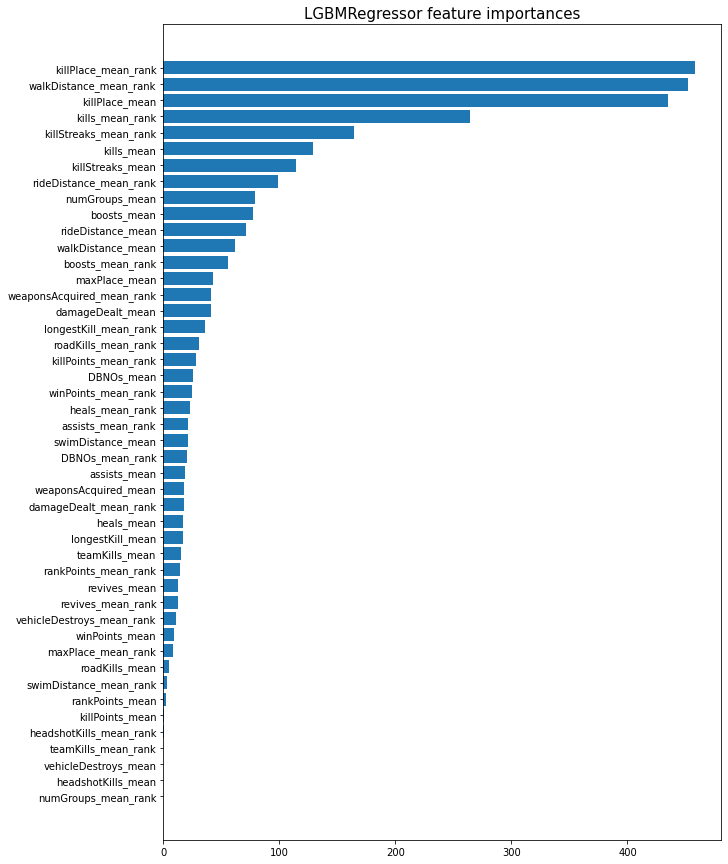

In [ ]:
model_lgb = model_lgb.sort_values(by= 'Model feature importances', ascending = True)
fig = plt.figure(figsize=(10,15))
plt.barh(model_lgb.index, model_lgb['Model feature importances'])
plt.title('LGBMRegressor feature importances', fontsize=15)
plt.show()

**tree기반 모델에서의 feature importances**

**lightGBM**
- ‘gain’ - the average gain of the feature when it is used in trees (default)
- ‘split’ - the number of times a feature is used to split the data across all trees
- ‘weight’ - the same as ‘split’, for better compatibility with XGBoost.


**XGBoost**
- Gain : 해당 feature가 모델 예측에 어느정도 영향을 미쳤는가를 측정하는 방법, 노드가 특정 feature로 분기되었을 때 얻는 성능 상의 이득 -> feature를 사용했을 때 줄어드는 평균적인 training loss
- Cover : 해당 feature와 관련된 샘플의 상대적인 개수, 변수 별 데이터를 분리하는데 쓰인 횟수(해당 변수로 인해 분리된 데이터의 수로 가중치)
- Weight : 해당 feature가 노드 분기에 사용된 횟수, 변수 별 데이터를 분리하는 데 쓰인 횟수

